<a href="https://colab.research.google.com/github/AshOne91/PLAYDATA-COLAB/blob/main/%EB%8F%99%EC%A0%81%ED%81%AC%EB%A1%A4%EB%A7%81_%EC%BD%94%EB%A0%99%EB%B2%84%EC%A0%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 구글 드라이버 연결
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 필요한 라이브러리 인스톨
!pip install selenium
!apt-get update

# (최초 1회)
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver '/content/drive/MyDrive/Colab Notebooks' #
!pip install chromedriver-autoinstaller

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.9/492.9 kB 28.3 MB/s eta 0:00:00
Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:8 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [69.0 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ub

In [ ]:
!python --version

import selenium
print(selenium.__version__)

Python 3.11.11
4.29.0


In [ ]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import sys
from selenium.webdriver.common.keys import Keys
import urllib.request
import os
from urllib.request import urlretrieve

import time
import pandas as pd
import chromedriver_autoinstaller  # setup chrome options

In [ ]:
# 크롬 드라이버 경로
chrome_path = "/content/drive/MyDrive/Colab Notebooks/chromedriver"

In [ ]:
# 셀리니움을 실행할때 적용할 옵션
# 백그라운드에서
sys.path.insert(0,chrome_path)
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') # ensure GUI is off
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')  # set path to chromedriver as per your configuration
chrome_options.add_argument('lang=ko_KR') # 한국어

chromedriver_autoinstaller.install()  # set the target URL

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import time

url = 'https://www.coffeebeankorea.com/store/store.asp'
driver = webdriver.Chrome(options=chrome_options)
driver.get(url)
time.sleep(1)

driver.execute_script("storePop2('400')")
time.sleep(1)
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

names = ['영업시간','주차','주소','전화번호','기타']
# saved_dict = {'매장명':   soup.find('div',class_='store_txt').text}
saved_dict = {'매장명':   soup.select('div.store_txt > h2')[0].text}

# 테이블 구조를 파싱
tr_lists = soup.select('#matizCoverLayer0Content > div > \
        div > div.store_txt > table > tbody:nth-child(1) > tr')

for idx,tr in enumerate(tr_lists):
    saved_dict[names[idx]] = tr.find('td').text
print(saved_dict)
driver.quit()

{'매장명': '경복궁역3번출구점', '영업시간': '월-금 07:00~22:00 | 토 08:00~22:00 | 일/공휴일 08:00~21:00 |', '주차': '', '주소': '서울특별시 종로구 자하문로 10  ', '전화번호': '02-557-0510', '기타': '홀케익 당일 수령가능'}


# 차량 등록대수 수집

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
from bs4 import BeautifulSoup
import time

url = 'https://auto.danawa.com/auto/?Work=record'
driver = webdriver.Chrome(options=chrome_options)
driver.get(url)
time.sleep(1)

year_select = Select(driver.find_element(By.XPATH, '//*[@id="selMonth"]') )
year_select.select_by_value("2024")
month_select = Select(driver.find_element(By.XPATH, '//*[@id="selDay"]') )
month_select.select_by_value("01")
time.sleep(3)

month_select = Select(driver.find_element(By.XPATH, '//*[@id="selDay"]') )
month_select.select_by_value("02")
time.sleep(3)

month_select = Select(driver.find_element(By.XPATH, '//*[@id="selDay"]') )
month_select.select_by_value("03")


driver.quit()

# 기간별로 수집 - 다나와

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
from bs4 import BeautifulSoup
import time

url = 'https://auto.danawa.com/auto/?Work=record'
driver = webdriver.Chrome()
driver.get(url)
time.sleep(1)

radio_button = driver.find_element(By.XPATH,'//*[@id="monthPeriodDiv"]/span[2]/label/input')
radio_button.click()
from_year = Select(driver.find_element(By.XPATH, '//*[@id="selMonthFrom"]') )
from_year.select_by_value("2024")
from_month = Select(driver.find_element(By.XPATH, '//*[@id="selDayFrom"]') )
from_month.select_by_value("01")

to_year = Select(driver.find_element(By.XPATH, '//*[@id="selMonthTo"]') )
to_year.select_by_value("2024")
to_month = Select(driver.find_element(By.XPATH, '//*[@id="selDayTo"]') )
to_month.select_by_value("12")

button = driver.find_element(By.XPATH,'//*[@id="monthPeriodDiv"]/span[2]/input')
button.click()
time.sleep(1)

more_search = driver.find_element(By.XPATH,
                    '//*[@id="autodanawa_gridC"]/div[3]/article/main/div/div[2]/div[1]/a')
more_search.click()
time.sleep(1)

# BeautiSoup으로 파싱
html = driver.page_source
driver.quit()

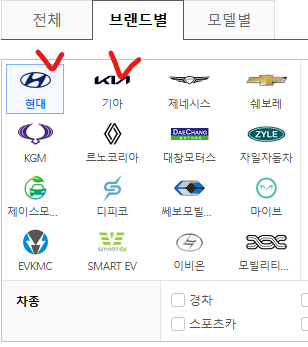

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
from bs4 import BeautifulSoup
import time

url = 'https://auto.danawa.com/auto/?Work=record'
driver = webdriver.Chrome()
driver.get(url)
time.sleep(1)

for i in range(1,17):
    button = driver.find_element(By.XPATH, f'//*[@id="finder_newcar"]/div[1]/div[1]/ul/li[{i}]/button')
    button.click()
    time.sleep(1)
    if i !=1 :
        button = driver.find_element(By.XPATH, f'//*[@id="finder_newcar"]/div[1]/div[1]/ul/li[{i-1}]/button')
        button.click()
        time.sleep(1)
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    datas = soup.select('#autodanawa_gridC > div.gridMain > \
        article > main > div > table.recordTable.model > tbody > tr')
    for row in datas:
        print(row.select('td.title')[0].text.strip())

driver.quit()

# e 나라지표
https://www.index.go.kr/unity/potal/main/EachDtlPageDetail.do?idx_cd=1257

In [ ]:
# 셀리니움으로 프레임전화 방식
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
from bs4 import BeautifulSoup
import time
import requests

url = 'https://www.index.go.kr/unity/potal/main/EachDtlPageDetail.do?idx_cd=1257'
driver = webdriver.Chrome()
driver.get(url)
time.sleep(1)

# iframe 찾기
iframe = driver.find_element(By.ID, 'showStblGams')
driver.switch_to.frame(iframe)  # iframe으로 변환
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')   # 소스 파싱
for tr in soup.select('#t_Table_125701 > tbody > tr'):
    print(tr.text)
    print('-'*100)

driver.quit()

# 한국교통안전공단_자동차종합정보 신규등록정보 서비스
https://www.data.go.kr/data/15059401/openapi.do

# 경기도_자동차등록 집계 현황

In [ ]:
import requests
import json
serviceKey = '4dr0Ui4/QMen1/waNp8qkB24tz549lFOnJIJl/BzZami5c434Bui7bVOp5j1EVKBJzQF2VCgW8QY2lbbXyhqNA=='
url = 'https://openapi.gg.go.kr/CarRegistration?'
params ={'KEY' : serviceKey, 'Type' : 'json'}
response.encoding = response.apparent_encoding  # 시스템에서 사용한 인코딩 자동 감지
response = requests.get(url, params=params)
result_dict = json.loads(response.content)
result_dict['row']
print(json.dumps(result_dict, indent=2,ensure_ascii=False) )


# 네이버 자동차

In [ ]:
url = 'https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&ssc=tab.nx.all&query=%EC%9E%90%EB%8F%99%EC%B0%A8+%ED%8C%90%EB%A7%A4%EB%9F%89&oquery=%EB%84%A4%EC%9D%B4%EB%B2%84+%EC%8B%A0%EC%B0%A8+%ED%8C%90%EB%A7%A4%EB%9F%89&tqi=i9nRHlqosesss4arjwKssssssyG-448832'
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
from bs4 import BeautifulSoup
import time
import requests

driver = webdriver.Chrome()
driver.get(url)
time.sleep(1)  # 웹사이트 기다림

button = driver.find_element(By.XPATH,'//*[@id="main_pack"]/div[3]/div[2]/div[1]/\
    div/div[1]/div/div[1]/a[2]')
button.click()
time.sleep(1)  # 팝업 기다림

button = driver.find_element(By.XPATH, '//*[@id="main_pack"]/div[3]/div[2]/div[1]/div\
    /div[1]/div/div[2]/div/div[2]/div/div/div/ul/li[1]/a')
button.click()
time.sleep(1)  # 변경된 데이터 반영 기다림

# 파싱
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
div_lists = soup.select('#main_pack > div.sc_new.cs_common_module.case_list.color_5._cs_car_month_list > \
    div.cm_content_wrap > div.cm_content_area > div > div._car_panel_wrapper > \
    div:nth-child(1) > div > div')
for div in div_lists:
    print(div.find('strong',class_='title').text ,
          div.find_all('span',class_='info_txt')[0].text,
          div.find_all('span',class_='info_txt')[1].text
         )

driver.quit()

# 2페이지가지 가져오기

In [ ]:
url = 'https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&ssc=tab.nx.all&query=%EC%9E%90%EB%8F%99%EC%B0%A8+%ED%8C%90%EB%A7%A4%EB%9F%89&oquery=%EB%84%A4%EC%9D%B4%EB%B2%84+%EC%8B%A0%EC%B0%A8+%ED%8C%90%EB%A7%A4%EB%9F%89&tqi=i9nRHlqosesss4arjwKssssssyG-448832'
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
from bs4 import BeautifulSoup
import time
import requests

driver = webdriver.Chrome()
driver.get(url)   # 메이 사이트 접속
time.sleep(1)  # 웹사이트 기다림

# 1월선택을 위해 month 팝업클릭
button = driver.find_element(By.XPATH,'//*[@id="main_pack"]/div[3]/div[2]/div[1]/\
    div/div[1]/div/div[1]/a[2]')
button.click()
time.sleep(1)  # 팝업 기다림

# month 팝업에서 1월 선택
button = driver.find_element(By.XPATH, '//*[@id="main_pack"]/div[3]/div[2]/div[1]/div\
    /div[1]/div/div[2]/div/div[2]/div/div/div/ul/li[1]/a')
button.click()
time.sleep(1)  # 변경된 데이터 반영 기다림

# 데이터 파싱
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
div_lists = soup.select('#main_pack > div.sc_new.cs_common_module.case_list.color_5._cs_car_month_list > \
    div.cm_content_wrap > div.cm_content_area > div > div._car_panel_wrapper > \
    div:nth-child(1) > div > div')
for div in div_lists:
    print(div.find('strong',class_='title').text ,
          div.find_all('span',class_='info_txt')[0].text,
          div.find_all('span',class_='info_txt')[1].text
         )

print('2 page -----------------------------------------------------------------')
# 다음페이지 이동
next_xpath = '//*[@id="main_pack"]/div[3]/div[2]/div[1]/div/div[4]/div/a[2]'
next_button = driver.find_element(By.XPATH, next_xpath)
next_button.click()
time.sleep(1) # 다음페이지 나올때 까지 기다림

# 데이터 파싱
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
div_lists = soup.select('#main_pack > div.sc_new.cs_common_module.case_list.color_5._cs_car_month_list > \
    div.cm_content_wrap > div.cm_content_area > div > div._car_panel_wrapper > \
    div:nth-child(2) > div > div')
for div in div_lists:
    print(div.find('strong',class_='title').text ,
          div.find_all('span',class_='info_txt')[0].text,
          div.find_all('span',class_='info_txt')[1].text
         )

# 종료
driver.quit()

# 전체 페이지 가져오기

In [ ]:
def data_parser(driver,page_num):
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    div_lists = soup.select(f'#main_pack > div.sc_new.cs_common_module.case_list.color_5._cs_car_month_list > \
        div.cm_content_wrap > div.cm_content_area > div > div._car_panel_wrapper > \
        div:nth-child({page_num}) > div > div')
    for div in div_lists:
        print(div.find('strong',class_='title').text ,
              div.find_all('span',class_='info_txt')[0].text,
              div.find_all('span',class_='info_txt')[1].text
             )

In [ ]:
url = 'https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&ssc=tab.nx.all&query=%EC%9E%90%EB%8F%99%EC%B0%A8+%ED%8C%90%EB%A7%A4%EB%9F%89&oquery=%EB%84%A4%EC%9D%B4%EB%B2%84+%EC%8B%A0%EC%B0%A8+%ED%8C%90%EB%A7%A4%EB%9F%89&tqi=i9nRHlqosesss4arjwKssssssyG-448832'
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
from bs4 import BeautifulSoup
import time
import requests

driver = webdriver.Chrome()
driver.get(url)   # 메이 사이트 접속
time.sleep(1)  # 웹사이트 기다림

# 1월선택을 위해 month 팝업클릭
button = driver.find_element(By.XPATH,'//*[@id="main_pack"]/div[3]/div[2]/div[1]/\
    div/div[1]/div/div[1]/a[2]')
button.click()
time.sleep(1)  # 팝업 기다림

# month 팝업에서 1월 선택
button = driver.find_element(By.XPATH, '//*[@id="main_pack"]/div[3]/div[2]/div[1]/div\
    /div[1]/div/div[2]/div/div[2]/div/div/div/ul/li[1]/a')
button.click()
time.sleep(1)  # 변경된 데이터 반영 기다림

data_parser(driver,1)
for i in range(2,14):  # 1
    print(f'페이지 {i}'+ ('-'*50) )
    # 다음페이지 이동
    next_xpath = '//*[@id="main_pack"]/div[3]/div[2]/div[1]/div/div[4]/div/a[2]'
    next_button = driver.find_element(By.XPATH, next_xpath)
    next_button.click()
    time.sleep(1) # 다음페이지 나올때 까지 기다림
    # 데이터 파싱
    data_parser(driver,i)

# 종료
driver.quit()